In [214]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [216]:
# read the dataset
df =  pd.read_csv('data/train.csv')

In [217]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [218]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [219]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [221]:
# Identifying the unique number of values in the dataset
df.nunique()

POSTED_BY                    3
UNDER_CONSTRUCTION           2
RERA                         2
BHK_NO.                     16
BHK_OR_RK                    2
SQUARE_FT                19561
READY_TO_MOVE                2
RESALE                       2
ADDRESS                   6899
LONGITUDE                 4087
LATITUDE                  4078
TARGET(PRICE_IN_LACS)     1172
dtype: int64

In [222]:
# We can sue the value count() methode to see the data distribution.
df.POSTED_BY.value_counts()

POSTED_BY
Dealer     18291
Owner      10538
Builder      622
Name: count, dtype: int64

In [223]:
# see all the columns
df.columns.values

array(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'], dtype=object)

Here the I am identifying what are the categorical feilds in the dataset.
-posted_by
-Under construction
-rera
-Ready to move
-Resale

In [224]:
print(df["RERA"].value_counts())
print(df["READY_TO_MOVE"].value_counts())
print(df["RESALE"].value_counts())

RERA
0    20088
1     9363
Name: count, dtype: int64
READY_TO_MOVE
1    24157
0     5294
Name: count, dtype: int64
RESALE
1    27377
0     2074
Name: count, dtype: int64


In [225]:
# see the categorical destribution from the dataset
categorical_feilds = ["POSTED_BY","UNDER_CONSTRUCTION","RERA" ,"READY_TO_MOVE","RESALE"]
df[categorical_feilds]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,READY_TO_MOVE,RESALE
0,Owner,0,0,1,1
1,Dealer,0,0,1,1
2,Owner,0,0,1,1
3,Owner,0,1,1,1
4,Dealer,1,0,0,1
...,...,...,...,...,...
29446,Owner,0,0,1,1
29447,Owner,0,0,1,1
29448,Dealer,0,0,1,1
29449,Owner,0,0,1,1


Here all the 4 felds are binary categorical feilds ->(rare, ready to move, resale, under construction)
but the posted_by feild is not binary categorical feild, it has 3 unique values.
so we can use the label encoder to convert the categorical feilds into numerical feilds. as below. her is the code to do that.

1. Label Encoding

Description: Assigns a unique integer to each category. This is suitable when the categorical variable is ordinal (has a meaningful order) or when the model can handle numerical values without assuming order (e.g., some tree-based algorithms).
Mapping for your data:

import pandas as pd

# Sample dataset
data = {'POSTED_BY': ['Dealer', 'Owner', 'Builder', 'Dealer', 'Owner']}
df = pd.DataFrame(data)

# Using pandas' factorize (or sklearn's LabelEncoder)
df['POSTED_BY_encoded'] = pd.factorize(df['POSTED_BY'])[0]

print(df)

Dealer → 0
Owner → 1
Builder → 2

2. One-Hot Encoding
This method creates binary columns for each category, where a 1 indicates the presence of the category and 0 indicates its absence. This is ideal for non-ordinal categorical variables and algorithms that don’t handle integer-encoded categories well (e.g., neural networks, linear models).

import pandas as pd

# Sample dataset
data = {'POSTED_BY': ['Dealer', 'Owner', 'Builder', 'Dealer', 'Owner']}
df = pd.DataFrame(data)

# Using pandas get_dummies
df_one_hot = pd.get_dummies(df, columns=['POSTED_BY'], prefix='POSTED_BY')

print(df_one_hot)

In [226]:
df["POSTED_BY"].describe()

count      29451
unique         3
top       Dealer
freq       18291
Name: POSTED_BY, dtype: object

<Axes: >

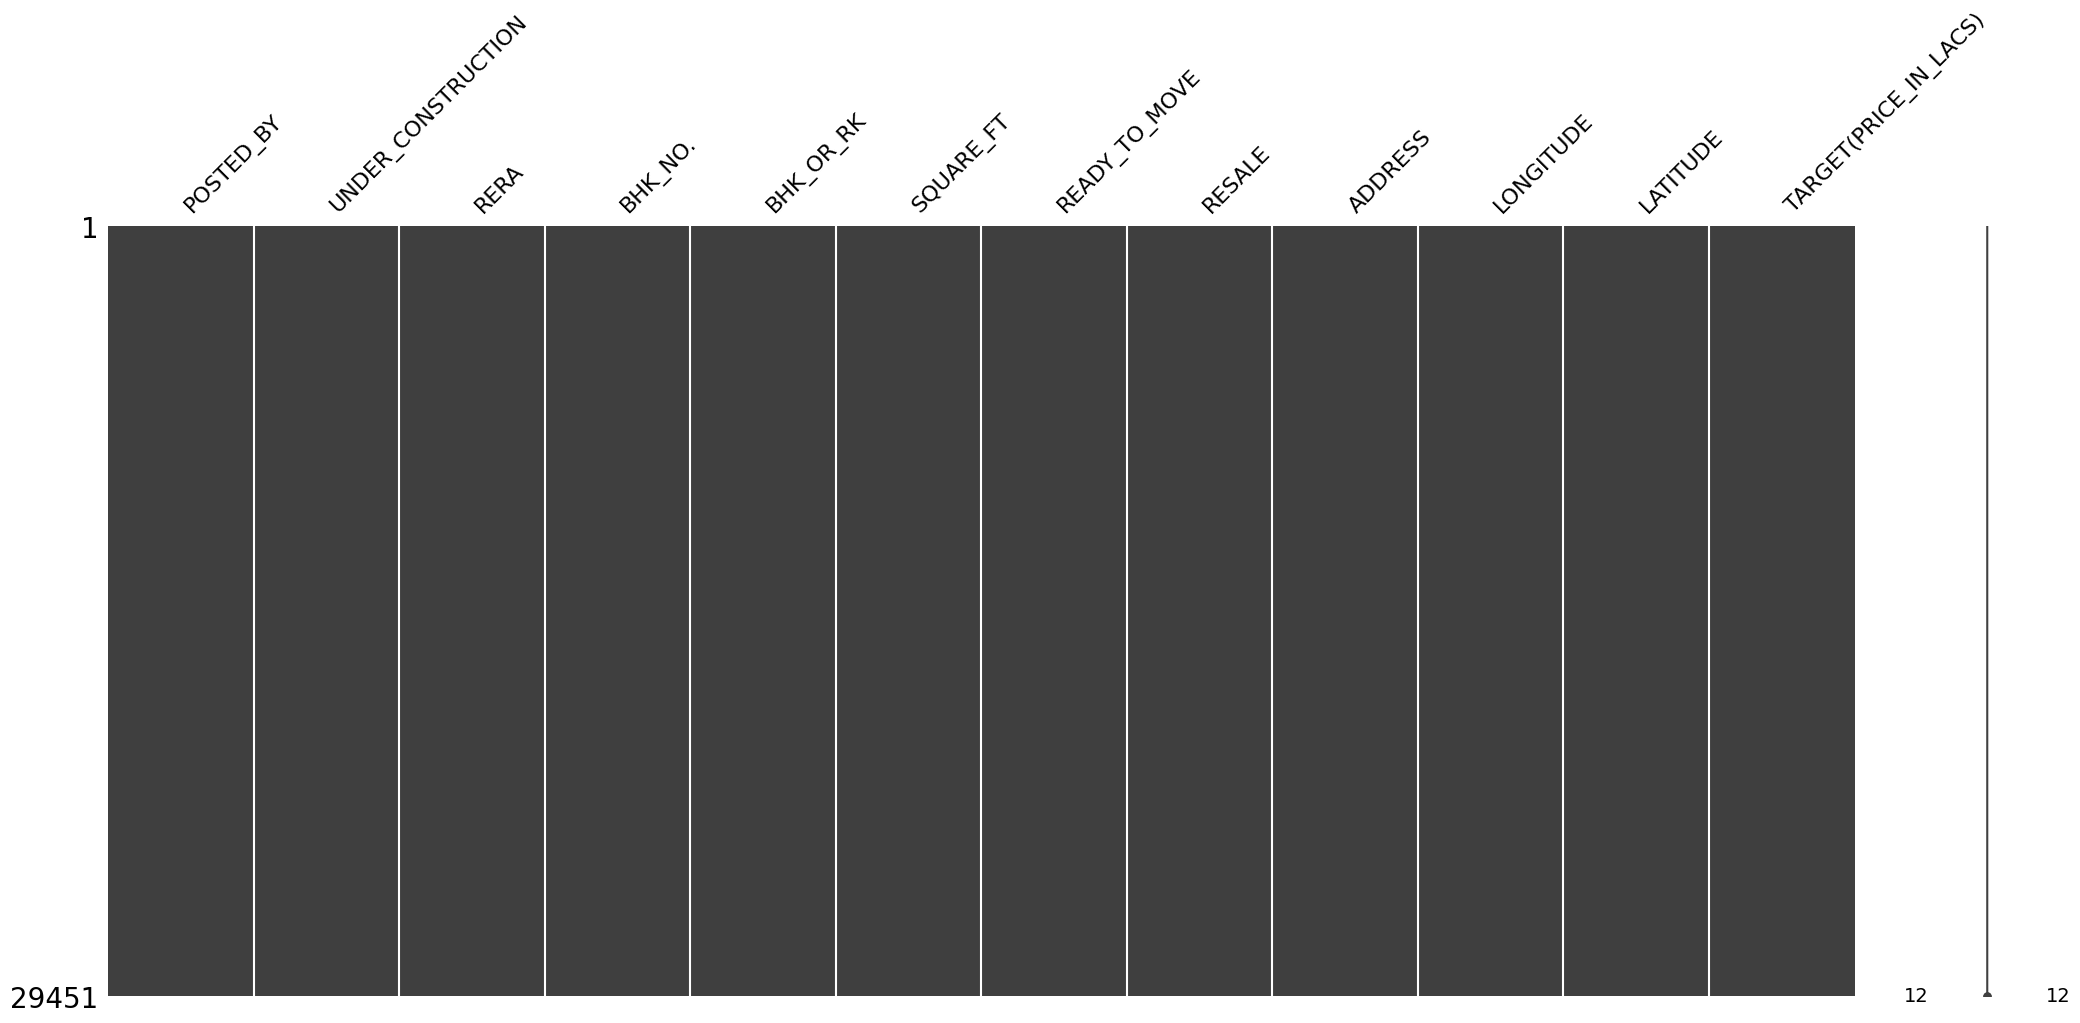

In [227]:
msno.matrix(df)

In [228]:
df["TARGET(PRICE_IN_LACS)"]

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 29451, dtype: float64

In [229]:
# get the rows where the target is NAN
df[np.isnan(df["TARGET(PRICE_IN_LACS)"])]
np.isnan(df["TARGET(PRICE_IN_LACS)"]).sum()

np.int64(0)

By this we can see there are no missing values in the dataset.All the lat longitude values are not zero.

In [230]:
df[df["LATITUDE"] == 0 ].index

Index([], dtype='int64')

In [231]:
df[df["LONGITUDE"] == 0 ].index

Index([], dtype='int64')

In [232]:
df.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

<Axes: >

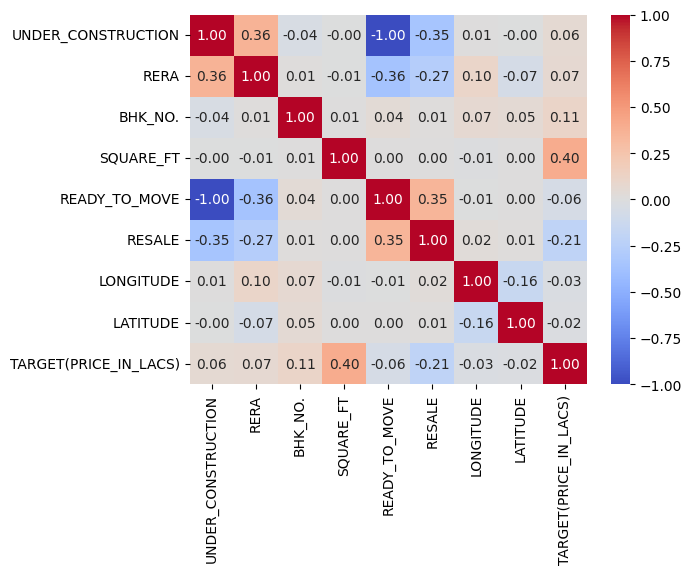

In [233]:
# Heatmap 
# Compute the correlation matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

### If "RK" is too rare to learn any pattern, you can treat it as "BHK"

In [234]:
df["BHK_OR_RK"].value_counts()

BHK_OR_RK
BHK    29427
RK        24
Name: count, dtype: int64

In [235]:
df['BHK_OR_RK'] = df['BHK_OR_RK'].replace('RK', 'BHK')


In [236]:
df.drop(columns=['BHK_OR_RK'], inplace=True)


## Spliting the data in to train and test data

In [237]:
# Here we need to prepare the datasets as X and Y (the perdiction)
X =  df.drop(columns=["TARGET(PRICE_IN_LACS)"])
y =  df["TARGET(PRICE_IN_LACS)"].values

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)

In [239]:
print(pd.Series(y).value_counts())

110.0     795
100.0     770
120.0     652
130.0     598
45.0      583
         ... 
69.4        1
8690.0      1
1170.0      1
8660.0      1
18.3        1
Name: count, Length: 1172, dtype: int64


### Here we do not need to add stratify=y in the train_test_split function, because we are not dealing with classification problem here. We are dealing with regression problem. So we can remove that.


### Here we need to deal with the string values
- Extract city names and create a categorical feature
- Use target encoding for cities (with proper cross-validation)
- Extract locality/sector information as separate features
- Add frequency encoding for the full address

In [240]:
df["ADDRESS"]  = df["ADDRESS"].apply(lambda x : x.strip())

In [241]:
df["ADDRESS"].value_counts(ascending=False).values.sum()

np.int64(29451)

### Here we are dividing the address in to 2 parts one for city and other for locality/sector.

In [242]:
# combine the X_train and X_test for the feature engineering
x_combine =  pd.concat([X_test,X_test] , keys=["train" ,"test"])
df2 =x_combine

In [243]:
# 1. EXTRACT CITY NAMES (last part after comma)
def extract_city(address):
    """Extract city name (assumes city is after the last comma)"""
    if pd.isna(address):
        return 'Unknown'
    parts = str(address).split(',')
    return parts[-1].strip() if len(parts) > 1 else 'Unknown'

Last part from the address is the city name and the rest is the locality/sector information.

In [244]:
df2['City'] = df2['ADDRESS'].apply(extract_city)
df2["City"]

train  27626           Noida
       21337       Ghaziabad
       10275       Ghaziabad
       18326        Lalitpur
       18689        Vadodara
                    ...     
test   27006       Bangalore
       23059    Secunderabad
       1639            Surat
       23443          Jaipur
       7532           Mumbai
Name: City, Length: 17672, dtype: object

In [245]:
# 2. EXTRACT LOCALITY/SECTOR (first part before comma)
def extract_locality(address):
    """Extract locality/sector information"""
    if pd.isna(address):
        return 'Unknown'
    parts = str(address).split(',')
    return parts[0].strip()


In [246]:
df2['Locality'] = df2['ADDRESS'].apply(extract_locality)

In [247]:
# unique parts in the city and the locality
df2["City"].value_counts()[df2["City"].value_counts() >= 10]

City
Bangalore     2594
Lalitpur      1808
Mumbai        1240
Pune          1194
Noida         1098
              ... 
Aligarh         12
Kottayam        10
Karad           10
Chandrapur      10
Kannur          10
Name: count, Length: 98, dtype: int64

In [248]:
# unique parts in the city and the locality
df2["Locality"].value_counts()[df2["Locality"].value_counts() >= 10]

Locality
Zirakpur               368
Raj Nagar Extension    128
Whitefield             124
Thane West             108
Kolshet Road            98
                      ... 
Kasba                   10
Bhayli                  10
Amar Shaheed Path       10
Sainath Nagar           10
Althan                  10
Name: count, Length: 419, dtype: int64

### (Dimentionality Reduction)Why this is useful for ML:

Feature engineering: Focus encoding efforts on frequent cities
Rare category handling: Group cities with <10 occurrences as "Other"
Data quality: Identify which cities have enough samples for reliable patterns

In [249]:
city_counts = df2["City"].value_counts()
df2["City"] = df2["City"].apply(lambda x: x if city_counts[x] >= 10 else "Other")

In [250]:
locality_counts = df2["Locality"].value_counts()
df2["Locality"] = df2["Locality"].apply(lambda x: x if locality_counts[x] >= 10 else "Other")

In [251]:
df2.head()

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO.    SQUARE_FT  \
train 27626    Dealer                   0     1        4  3357.112883   
      21337    Dealer                   0     0        2   960.133584   
      10275     Owner                   0     0        2   860.079715   
      18326    Dealer                   0     1        2  1333.333333   
      18689   Builder                   1     1        2   760.103819   

             READY_TO_MOVE  RESALE                  ADDRESS  LONGITUDE  \
train 27626              1       1    Sector-78 Noida,Noida  28.560719   
      21337              1       1  Vaibhav Khand,Ghaziabad  28.919600   
      10275              1       1   Gyan Khand 3,Ghaziabad  28.666670   
      18326              1       1  Sector 23 Ulwe,Lalitpur  28.509982   
      18689              0       0     Kareli Bagh,Vadodara  22.316415   

              LATITUDE       City         Locality  
train 27626  77.386208      Noida  Sector-78 Noida  
      21337  76.897200  Ghaziabad    Vaibhav Khand  
      10275  77.416670  Ghaziabad            Other  
      18326  77.051850   Lalitpur   Sector 23 Ulwe  
      18689  73.202906   Vadodara            Other

In [252]:
# drop the address col
df2.drop(columns=["ADDRESS"])

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO.    SQUARE_FT  \
train 27626    Dealer                   0     1        4  3357.112883   
      21337    Dealer                   0     0        2   960.133584   
      10275     Owner                   0     0        2   860.079715   
      18326    Dealer                   0     1        2  1333.333333   
      18689   Builder                   1     1        2   760.103819   
...               ...                 ...   ...      ...          ...   
test  27006    Dealer                   0     0        3  2295.332823   
      23059     Owner                   0     0        2   999.143591   
      1639      Owner                   0     0        1   600.000000   
      23443    Dealer                   0     0        3  1300.034211   
      7532     Dealer                   0     1        1   700.012727   

             READY_TO_MOVE  RESALE  LONGITUDE   LATITUDE          City  \
train 27626              1       1  28.560719  77.386208         Noida   
      21337              1       1  28.919600  76.897200     Ghaziabad   
      10275              1       1  28.666670  77.416670     Ghaziabad   
      18326              1       1  28.509982  77.051850      Lalitpur   
      18689              0       0  22.316415  73.202906      Vadodara   
...                    ...     ...        ...        ...           ...   
test  27006              1       1  13.040340  77.591347     Bangalore   
      23059              1       1  17.450000  78.500000  Secunderabad   
      1639               1       1  24.395822  78.989627         Surat   
      23443              1       1  26.979452  75.765051        Jaipur   
      7532               1       1  19.058710  72.899690        Mumbai   

                    Locality  
train 27626  Sector-78 Noida  
      21337    Vaibhav Khand  
      10275            Other  
      18326   Sector 23 Ulwe  
      18689            Other  
...                      ...  
test  27006           Hebbal  
      23059            Other  
      1639            Adajan  
      23443            Other  
      7532           Chembur  

[17672 rows x 11 columns]

In [253]:
df2.shape

(17672, 12)

In [254]:
# Use one hot encoding in the City and Locality
city_dummies = pd.get_dummies(df2["City"]).astype(int)

In [255]:
locality_dummies = pd.get_dummies(df2["Locality"]).astype(int)

In [256]:
# concatanating the city and locality dummies
df2 = pd.concat([df2, city_dummies, locality_dummies], axis=1)


In [257]:
# Drop the city and locality cols
df2 = df2.drop(columns=["City","Locality"])

In [258]:
df2 =df2.drop(columns=["ADDRESS"])

### Now we need to re divide the data in to train and test data.

In [259]:
X_train_encoded = df2.xs("train")
X_test_encoded = df2.xs("test")

### also study this way (using sklearn's)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


**
categorical_features = ['location']  # your categorical column

# Define transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the transformation only to train, then to test
preprocessor.fit(X_train)  # fit only on train to avoid leakage
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)**


In [260]:
df2.head()

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO.    SQUARE_FT  \
train 27626    Dealer                   0     1        4  3357.112883   
      21337    Dealer                   0     0        2   960.133584   
      10275     Owner                   0     0        2   860.079715   
      18326    Dealer                   0     1        2  1333.333333   
      18689   Builder                   1     1        2   760.103819   

             READY_TO_MOVE  RESALE  LONGITUDE   LATITUDE  Agra  ...  Wanowrie  \
train 27626              1       1  28.560719  77.386208     0  ...         0   
      21337              1       1  28.919600  76.897200     0  ...         0   
      10275              1       1  28.666670  77.416670     0  ...         0   
      18326              1       1  28.509982  77.051850     0  ...         0   
      18689              0       0  22.316415  73.202906     0  ...         0   

             Wardha Road  Whitefield  Worli  Yelahanka  Yeshwanthpur  \
train 27626            0           0      0          0             0   
      21337            0           0      0          0             0   
      10275            0           0      0          0             0   
      18326            0           0      0          0             0   
      18689            0           0      0          0             0   

             Zingabai Takli  Zirakpur  kavesar  sector-121 Noida  
train 27626               0         0        0                 0  
      21337               0         0        0                 0  
      10275               0         0        0                 0  
      18326               0         0        0                 0  
      18689               0         0        0                 0  

[5 rows x 528 columns]

In [261]:
df2.nunique()

POSTED_BY                3
UNDER_CONSTRUCTION       2
RERA                     2
BHK_NO.                 13
SQUARE_FT             6961
                      ... 
Yeshwanthpur             2
Zingabai Takli           2
Zirakpur                 2
kavesar                  2
sector-121 Noida         2
Length: 528, dtype: int64

In [262]:
df2.dtypes

POSTED_BY              object
UNDER_CONSTRUCTION      int64
RERA                    int64
BHK_NO.                 int64
SQUARE_FT             float64
                       ...   
Yeshwanthpur            int64
Zingabai Takli          int64
Zirakpur                int64
kavesar                 int64
sector-121 Noida        int64
Length: 528, dtype: object

### Lable encode the OWNER col

In [263]:
encoder = LabelEncoder()
encoder.fit(X_train["POSTED_BY"]) 

X_train_encoded['POSTED_BY'] = encoder.transform(X_train_encoded['POSTED_BY'])
X_test_encoded['POSTED_BY'] = encoder.transform(X_test_encoded['POSTED_BY'])

C:\Users\Samin Chandeepa\AppData\Local\Temp\ipykernel_5832\3392966411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_encoded['POSTED_BY'] = encoder.transform(X_train_encoded['POSTED_BY'])
C:\Users\Samin Chandeepa\AppData\Local\Temp\ipykernel_5832\3392966411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_encoded['POSTED_BY'] = encoder.transform(X_test_encoded['POSTED_BY'])


In [264]:
X_test_encoded

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Agra,...,Wanowrie,Wardha Road,Whitefield,Worli,Yelahanka,Yeshwanthpur,Zingabai Takli,Zirakpur,kavesar,sector-121 Noida
27626,1,0,1,4,3357.112883,1,1,28.560719,77.386208,0,...,0,0,0,0,0,0,0,0,0,0
21337,1,0,0,2,960.133584,1,1,28.919600,76.897200,0,...,0,0,0,0,0,0,0,0,0,0
10275,2,0,0,2,860.079715,1,1,28.666670,77.416670,0,...,0,0,0,0,0,0,0,0,0,0
18326,1,0,1,2,1333.333333,1,1,28.509982,77.051850,0,...,0,0,0,0,0,0,0,0,0,0
18689,0,1,1,2,760.103819,0,0,22.316415,73.202906,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27006,1,0,0,3,2295.332823,1,1,13.040340,77.591347,0,...,0,0,0,0,0,0,0,0,0,0
23059,2,0,0,2,999.143591,1,1,17.450000,78.500000,0,...,0,0,0,0,0,0,0,0,0,0
1639,2,0,0,1,600.000000,1,1,24.395822,78.989627,0,...,0,0,0,0,0,0,0,0,0,0
23443,1,0,0,3,1300.034211,1,1,26.979452,75.765051,0,...,0,0,0,0,0,0,0,0,0,0


### Standardize the numerical features

In [266]:
df2.head()

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO.    SQUARE_FT  \
train 27626    Dealer                   0     1        4  3357.112883   
      21337    Dealer                   0     0        2   960.133584   
      10275     Owner                   0     0        2   860.079715   
      18326    Dealer                   0     1        2  1333.333333   
      18689   Builder                   1     1        2   760.103819   

             READY_TO_MOVE  RESALE  LONGITUDE   LATITUDE  Agra  ...  Wanowrie  \
train 27626              1       1  28.560719  77.386208     0  ...         0   
      21337              1       1  28.919600  76.897200     0  ...         0   
      10275              1       1  28.666670  77.416670     0  ...         0   
      18326              1       1  28.509982  77.051850     0  ...         0   
      18689              0       0  22.316415  73.202906     0  ...         0   

             Wardha Road  Whitefield  Worli  Yelahanka  Yeshwanthpur  \
train 27626            0           0      0          0             0   
      21337            0           0      0          0             0   
      10275            0           0      0          0             0   
      18326            0           0      0          0             0   
      18689            0           0      0          0             0   

             Zingabai Takli  Zirakpur  kavesar  sector-121 Noida  
train 27626               0         0        0                 0  
      21337               0         0        0                 0  
      10275               0         0        0                 0  
      18326               0         0        0                 0  
      18689               0         0        0                 0  

[5 rows x 528 columns]

In [267]:
scaler = StandardScaler()
numeric_cols = ["SQUARE_FT" ,"LONGITUDE" ,"LATITUDE"]

X_train_encoded[numeric_cols] = scaler.fit_transform(X_train_encoded[numeric_cols])

X_test_encoded[numeric_cols] = scaler.transform(X_test_encoded[numeric_cols])


C:\Users\Samin Chandeepa\AppData\Local\Temp\ipykernel_5832\1748512891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_encoded[numeric_cols] = scaler.fit_transform(X_train_encoded[numeric_cols])
C:\Users\Samin Chandeepa\AppData\Local\Temp\ipykernel_5832\1748512891.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_encoded[numeric_cols] = scaler.transform(X_test_encoded[numeric_cols])


In [268]:
X_train = X_test_encoded
X_test = X_test_encoded

In [269]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)